In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#skips comments and read the rest of the lines
with open("ASTR19_S22_group_project_data.txt", "r") as f:
    f.readline()
    f.readline()
    f.readline()
    
    lines = f.readlines()

# empty arrays
d = []
t = []
h = []

# create arrays for day, time, and height
for line in lines:
    day, time, height = line.split()
    d.append(int(day))
    t.append(time)
    h.append(float(height))

# convert to hours 
t = np.array([int(time.split(':')[0]) + int(time.split(':')[1]) / 60 for time in t])

i = 0;
for days in d:
    day = (days - 1) * 24;
    t[i] += day
    i += 1

In [3]:
x = np.arange(8, 984, 6.2)

In [213]:
actual_tide_values = np.array(h)

initial_guess = [(np.max(actual_tide_values) - np.min(actual_tide_values)), 1/24, 0, np.mean(actual_tide_values)]

def tide_function(time, amplitude, frequency, phase_shift, offset):
    return amplitude * np.sin(2*np.pi*frequency * time + phase_shift) + offset

params, covariance = curve_fit(tide_function, t, actual_tide_values,  p0=initial_guess)

fitted_tide_values = tide_function(t, *params)


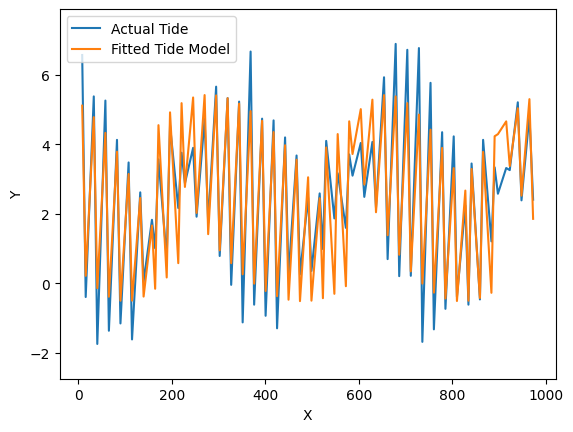

In [214]:
plt.figure()
plt.plot(t, actual_tide_values, label='Actual Tide')
plt.plot(t, fitted_tide_values, label='Fitted Tide Model')
plt.ylim(min(actual_tide_values) - 1, max(actual_tide_values) + 1)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
# plt.savefig("Waves.png")
plt.show()